In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os      
import pandas as pd

In [8]:
def print_logs(dir):                                                                                                                                                                                                          
    subdirs = [x[0] for x in os.walk(dir) if x[0] is not dir] 
    for subdir in subdirs:
        files = [x[2] for x in os.walk(subdir)]
        for file in files[0]:
            if file.endswith(".npy"):
                filepath = subdir + '/' + file
                log = np.load(filepath)
                plt.figure(figsize=(15,10))
                plt.plot(log[:,0])
                plt.plot(log[:,1], color='red')
                plt.title(str(subdir)) 
                plt.savefig(subdir + '/' + 'lossplot.png')
                plt.close()
                plt.figure(figsize=(15,10))
                plt.plot(log[:,3])
                plt.title(str(subdir) + ' Learning Rate Decay') 
                plt.savefig(subdir + '/' + 'learning_rate.png')
                plt.close()
                plt.figure(figsize=(15,10))
                plt.plot(log[:,2])
                plt.title(str(subdir) + ' Perplexity') 
                plt.savefig(subdir + '/' + 'perplexity.png')
                plt.close()

In [3]:
print_logs('output')

In [33]:
results = pd.DataFrame()

def gather_losses(dir):                                                                                                                                                                                                          
    subdirs = [x[0] for x in os.walk(dir) if x[0] is not dir] 
    for subdir in subdirs:
        files = [x[2] for x in os.walk(subdir)]
        for file in files[0]:
            if file.endswith(".npy"):
                filepath = subdir + '/' + file
                log = np.load(filepath)
                results['testloss_' + subdir.split('/')[-1]] = log[:,1]
                results['perplexity_' + subdir.split('/')[-1]] = log[:,2]

In [34]:
gather_losses('output')

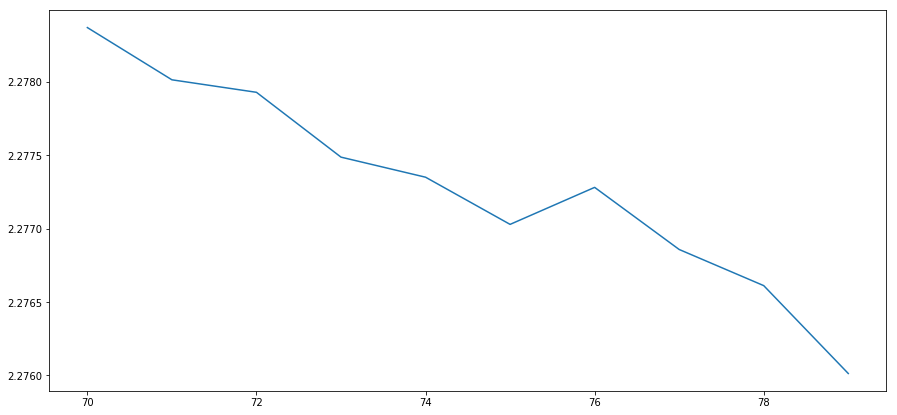

In [35]:
_ = results.loc[70:,'testloss_1000_2_200'].plot(figsize=(15,7))

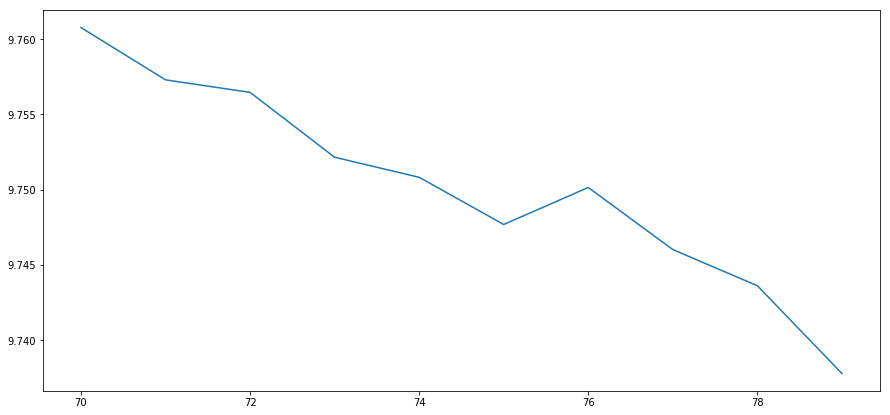

In [38]:
_ = results.loc[70:,'perplexity_1000_2_200'].plot(figsize=(15,7))